# Exercise Introduction

The TV show *Silicon Valley* had an app called "See Food" that promised to identify food in pictures (demo of the app [in this tense scene](https://www.youtube.com/watch?v=ACmydtFDTGs)). 

In this exercise, you will use a pre-trained model and TensorFlow to build the engine for this app.

**Fork this notebook** and follow the steps below.

# 1) Create Image Paths
We have supplied image files to examine. Run the cell below to store the filepaths with the name `image_paths`.

In [1]:
from os.path import join

hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog'

hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['823536.jpg',
                             '99890.jpg']]

image_paths = hot_dog_paths + not_hot_dog_paths

# 2) Set Up Preprocessing
Copy the `read_and_prep_images` function from the instructional page into the cell below (replacing the stub for that function that is currently there).

In [2]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 3) Modeling
1. Create a Resnet50 model and save it as `my_model`.
2. Apply the `read_and_prep_images` function to `image_paths` and save the result as `image_data`.
3. Use `my_model` to predict the contents of `image_data`.  Store the results in `my_preds`.
4. Apply the `decode_predictions` function to `my_preds`.  We could focus on just the top prediction for each image with the argument `top=1`.

You can review the instructional page to remind yourself how to do this.

In [6]:
from tensorflow.python.keras.applications import ResNet50
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

test_data = read_and_prep_images(image_paths)
my_preds = my_model.predict(test_data)


import sys
sys.path.append('/kaggle/input/python-utility-code-for-deep-learning-exercises/utils')

from decode_predictions import decode_predictions

most_likely_labels = decode_predictions(my_preds, top=1, class_list_path='../input/resnet50/imagenet_class_index.json')



# 4) Visualize Your Results

Uncomment the lines below to visualize your results.

Import the `decode predictions` function we use to get the top labels. TensorFlow includes an alternative version of this function, but we'll use a version optimized for running on Kaggle Kernels.

In [1]:
import sys
from learntools.deep_learning.decode_predictions import decode_predictions


Uncomment the lines below to see the sample images and predictions

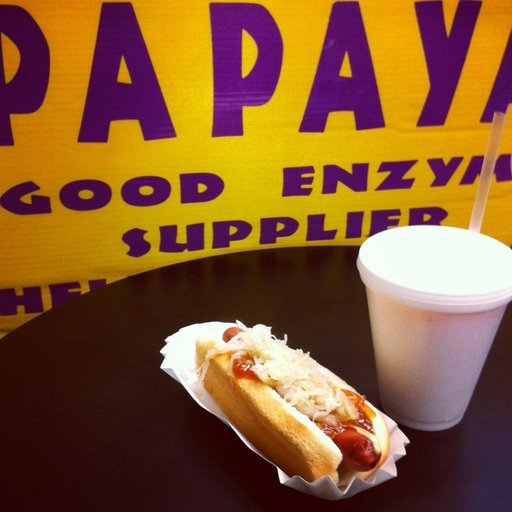

[('n07697537', 'hotdog', 0.9774525)]


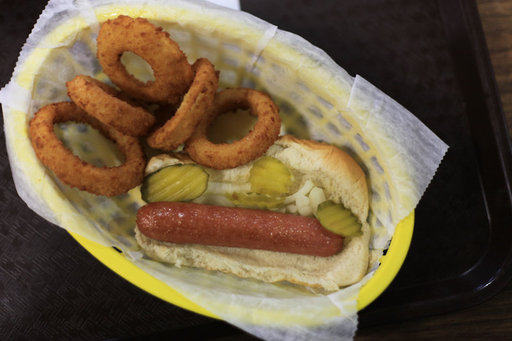

[('n07697537', 'hotdog', 0.97652984)]


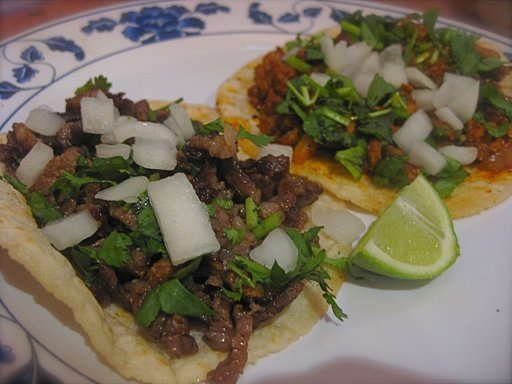

[('n07579787', 'plate', 0.61881053)]


In [ ]:
from IPython.display import Image, display

for i, img_path in enumerate(image_paths):
     display(Image(img_path))
     print(most_likely_labels[i])
        

# Keep Going
**You are ready for [Transfer Learning](https://www.kaggle.com/dansbecker/transfer-learning/), which will allow you to apply the same level of power for your custom purposes.**

---
**[Deep Learning Track Home](https://www.kaggle.com/learn/deep-learning)**